<a href="https://colab.research.google.com/github/rjerome1949/Python_Projects/blob/main/Project_3_Logistic_Regression_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 3 Logistic Regression - Framingham Heart Study **

Nancy Condon, Jerome Anderson, Justin Alde, Sayaka Berkley, Blossom Anyanwu

**Introduction**

The dataset used for this project is the Framingham Heart Study data found on Kaggle. The documentation on Kaggle was almost non-existent. The website said the dataset was updated five years ago. It is doubtful the data used for this project is up to date.

The Framingham Heart Study began in 1948. It was spurred, at least to some extent, by the death of President Franklin Delano Roosevelt, who died of complications from hypertension. Just prior to his death, his blood pressure reading was 300/190. In order to learn more about cardiovascular disease, in 1948 Congress funded the National Heart Act with $500,000. The Act created the National Heart Institute and funded a 20-year epidemiological study of cardio-vascular disease. Framingham, Massachusetts was selected as the site for the study. The study was to be an ongoing study of a cohort of residents of Framingham. The first cohort was selected between 1948 and 1952. The study has been continuously funded since then. Boston University has held the grant since 1971. It was most recently renewed in 2019 for a six-year term.

The dataset on Kaggle contained 4,238 observations. There are 16 variables in the dataset. The last variable in the dataset, TenYearCHD, is the 10-year risk of coronary heart disease. It is coded 1 if “yes” and 2 if “no.” On Kaggle, the dataset is described as one to be used for the logistic regression study of heart disease.

References: (1) Framingham Heart Study Awarded $38 Million for Next Six Years, downloaded 26 April 2024 from https://www.bumc.bu.edu/camed/2019/04/12/framingham-heart-study-awarded-38-million-for-next-six-years/#:~:text=School%20of%20Medicine-,Framingham%20Heart%20Study%20Awarded%20%2438%20Million%20for%20Next%20Six%20Years,%2C%20and%20Blood%20Institute%20(NHLBI) (2) Mahmood et al. (2014). The Framingham Heart Study and the Epidemiology of Cardiovascular Diseases: A Historical Perspective. Lancet, 383(9921): 999–1008. doi:10.1016/S0140-6736(13)61752-3



**Import Libraries**

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import os

In [ ]:
import warnings

**Load / Read CSV File**

In [157]:
from google.colab import files
uploaded = files.upload()

Saving framingham_cleaned.csv to framingham_cleaned (3).csv


In [158]:
df = pd.read_csv('framingham_cleaned.csv')

**Remove missing values and duplicates**

In [159]:
# Handle missing values
df = df.dropna()

In [160]:
# Remove duplicates
df = df.drop_duplicates()

# **Exploratory Data Analsyes**

In [161]:
print(df)
print(list(df.columns))

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39          4              0           0       0   
1        0   46          2              0           0       0   
2        1   48          1              1          20       0   
3        0   61          3              1          30       0   
4        0   46          3              1          23       0   
...    ...  ...        ...            ...         ...     ...   
3651     1   58          3              0           0       0   
3652     1   68          1              0           0       0   
3653     1   50          1              1           1       0   
3654     1   51          3              1          43       0   
3655     0   52          2              0           0       0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  \
0                   0             0         0      195    106     70   27   
1                   0             0         0      250    121    

In [162]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3099
1     557
Name: count, dtype: int64

In [163]:
count_no_heart_disease = len(df[df['TenYearCHD']==0])
count_heart_disease = len(df[df['TenYearCHD']==1])
pct_of_no_heart_disease = count_no_heart_disease/(count_no_heart_disease+count_heart_disease)
print("percentage of no heart disease is", pct_of_no_heart_disease*100)
pct_of_heart_disease = count_heart_disease/(count_no_heart_disease+count_heart_disease)
print("percentage of heart disease", pct_of_heart_disease*100)

percentage of no heart disease is 84.76477024070022
percentage of heart disease 15.23522975929978


84.76 % of people in this dataset did not have a 10-year risk of developing chronic heart disease.

**Correlations TenYearCHD and indepentent variables**

These calculations were made to determine which of the independent variables would most likely predict a person's 10-year risk of chronic heart disease.

In [164]:
from scipy.stats import pearsonr

a = df['male']
b = df['TenYearCHD']
r_coef, r_p = pearsonr(a, b)
print(f"Pearson r gender {r_coef: .3f}")

Pearson r gender  0.092


In [165]:
a = df ['age']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r age {r_coef: .3f}")

Pearson r age  0.234


In [166]:
a = df ['currentSmoker']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Current Smoker {r_coef: .3f}")

Pearson r Current Smoker  0.019


In [167]:
a = df ['cigsPerDay']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Cigarettes/Day {r_coef: .3f}")

Pearson r Cigarettes/Day  0.052


In [168]:
a = df ['BPMeds']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r BP Medication {r_coef: .3f}")

Pearson r BP Medication  0.089


In [169]:
a = df ['prevalentStroke']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Prior Stroke {r_coef: .3f}")

Pearson r Prior Stroke  0.048


In [170]:
a = df ['prevalentHyp']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Hypertension {r_coef: .3f}")

Pearson r Hypertension  0.182


In [171]:
a = df ['diabetes']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r diabetes {r_coef: .3f}")

Pearson r diabetes  0.093


In [172]:
a = df ['totChol']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Total Cholesterol {r_coef: .3f}")

Pearson r Total Cholesterol  0.091


In [173]:
a = df ['sysBP']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Systolic BP {r_coef: .3f}")

Pearson r Systolic BP  0.223


In [174]:
a = df ['diaBP']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Diastolic BP {r_coef: .3f}")

Pearson r Diastolic BP  0.150


In [175]:
a = df ['BMI']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r BMI {r_coef: .3f}")

Pearson r BMI  0.081


In [176]:
a = df ['heartRate']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Heart Rate {r_coef: .3f}")

Pearson r Heart Rate  0.021


In [177]:
a = df ['glucose']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Glucose Level {r_coef: .3f}")

Pearson r Glucose Level  0.122


In [209]:
a = df ['education']
b = df ['TenYearCHD']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Education Level {r_coef: .3f}")

Pearson r Education Level -0.063


Among all the variables, age and systolic BP have the highest correlations ( 0.23 and 0.22, respectively) with the 10-year risk of developing chronic heart disease.

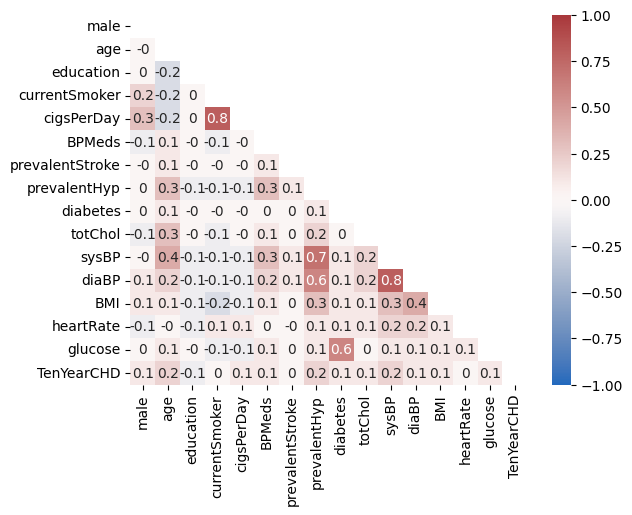

In [179]:

matrix = df.corr().round(1)

mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot = True, vmax = 1, vmin=-1, center=0, cmap = 'vlag', mask=mask)
plt.show()

**At risk for CHD by Gender**

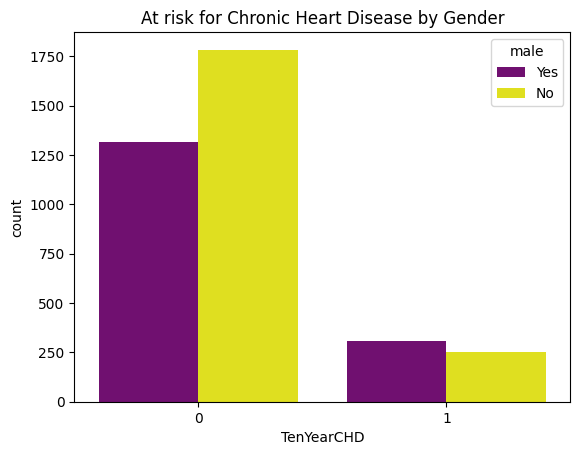

In [180]:

# Apply the mapping
df['male'] = df['male'].map({0: 'No', 1: 'Yes'})

custom_palette=['purple', 'yellow']
sns.set_palette(custom_palette)
sns.countplot(x='TenYearCHD', data=df, hue='male').set(title ="At risk for Chronic Heart Disease by Gender")
plt.show()

Males have a slighty higher risk for chronic heart disease.

**Age**

In [181]:
df['age'].describe()

count    3656.000000
mean       49.557440
std         8.561133
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

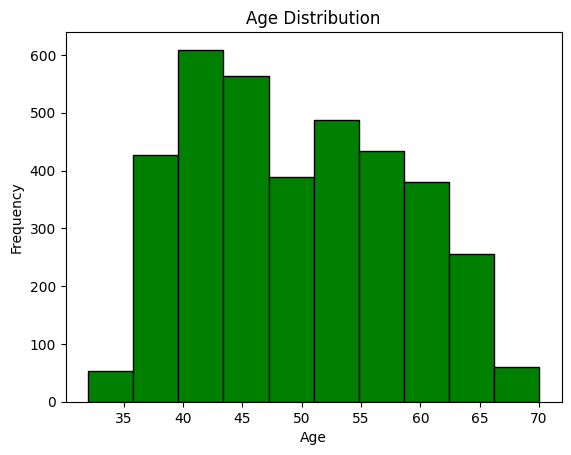

In [182]:
plt.hist(df['age'], bins=10, edgecolor='black', color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Boxplots with variables**

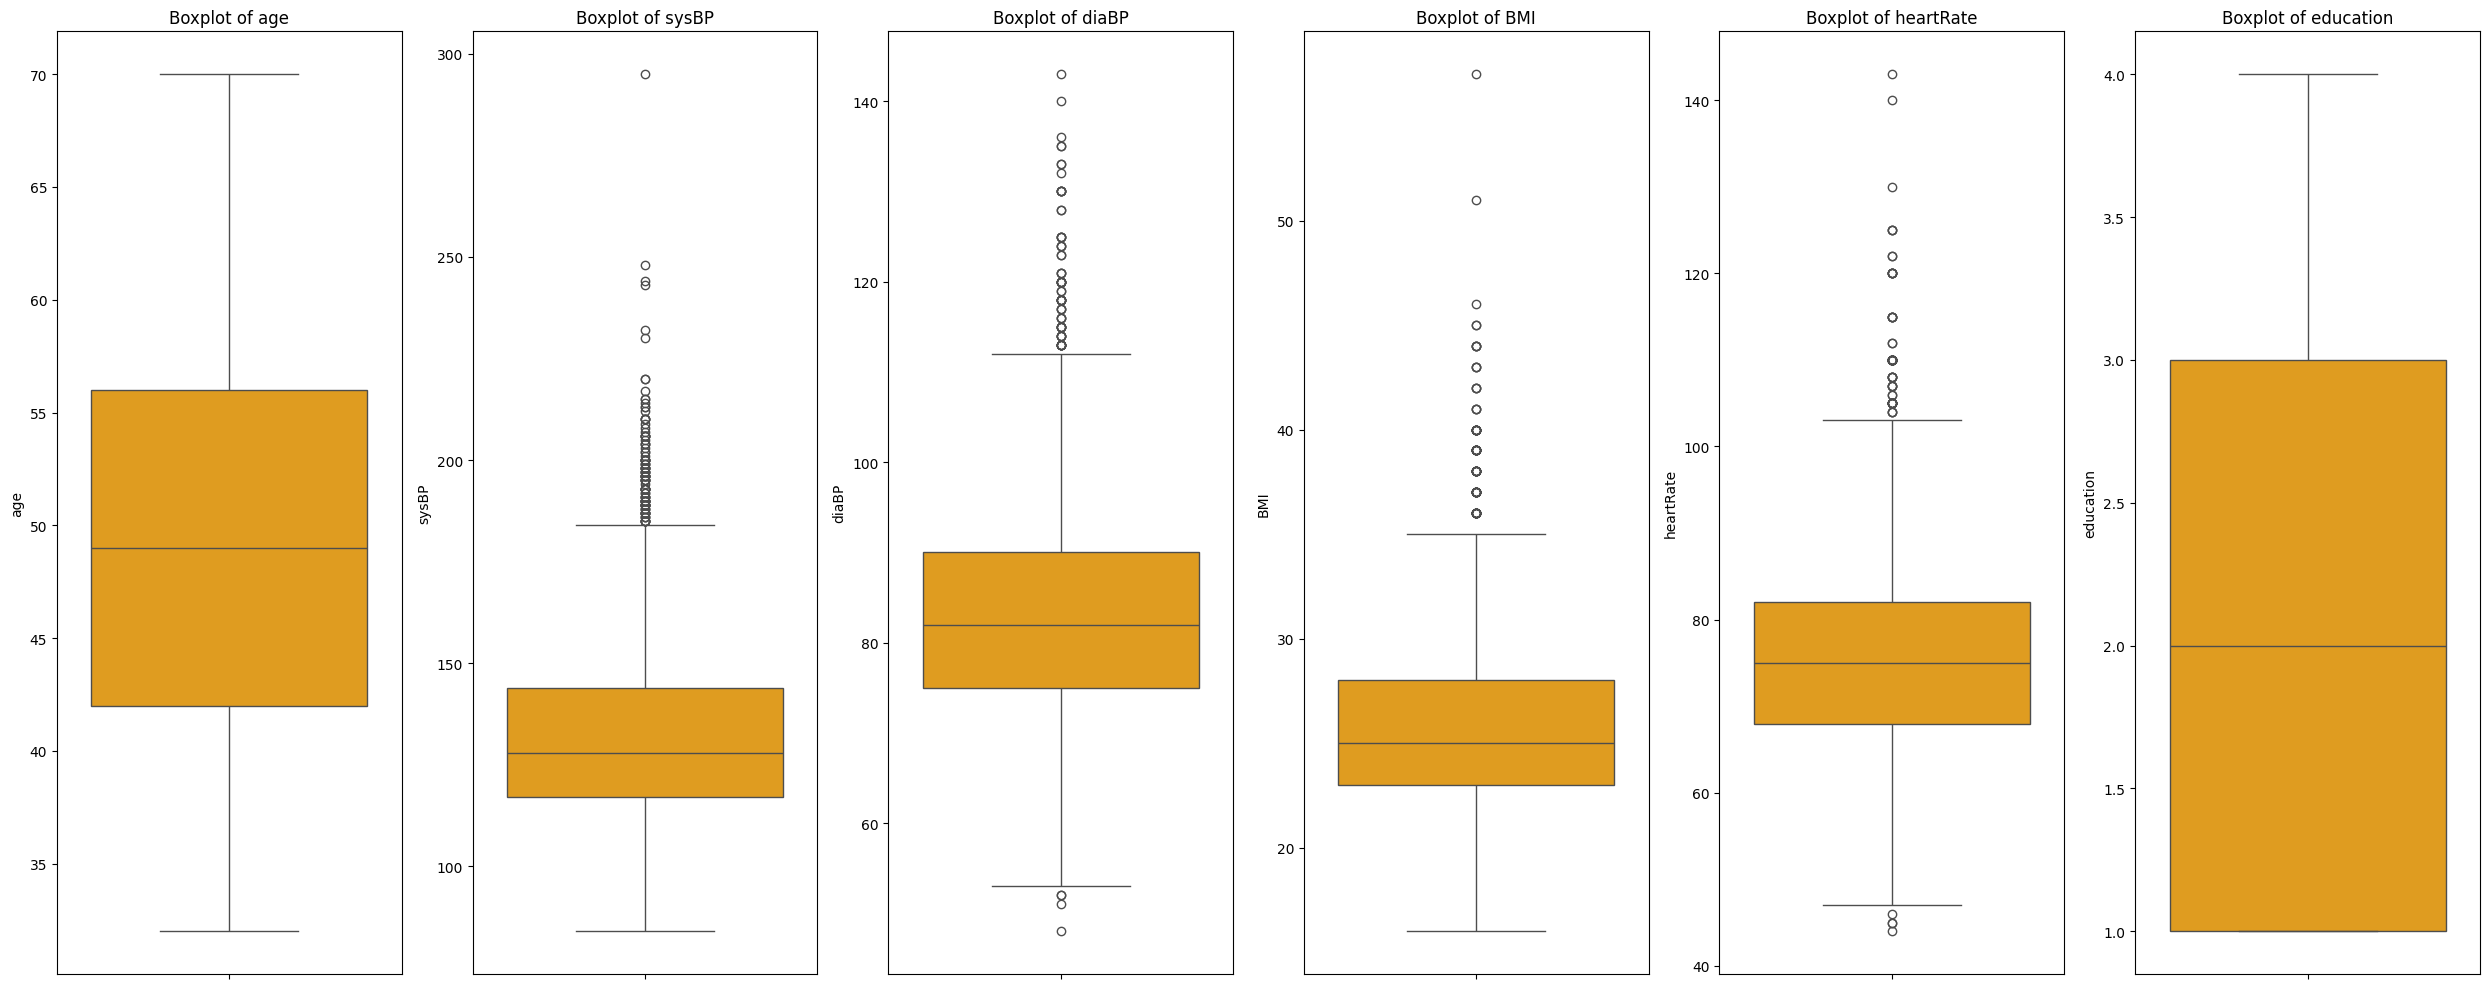

In [183]:
fig, ax = plt.subplots(1, 6, figsize=(25,10))
variables = ['age', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'education']
for i, var in enumerate(variables):
    sns.boxplot(data=df, ax=ax[i], y=var, color='orange')
    ax[i].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

<ipython-input-184-771300a183f9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="prevalentHyp", y="sysBP", palette="Set1")


Text(0.5, 0, 'Prevalent Hypertension')

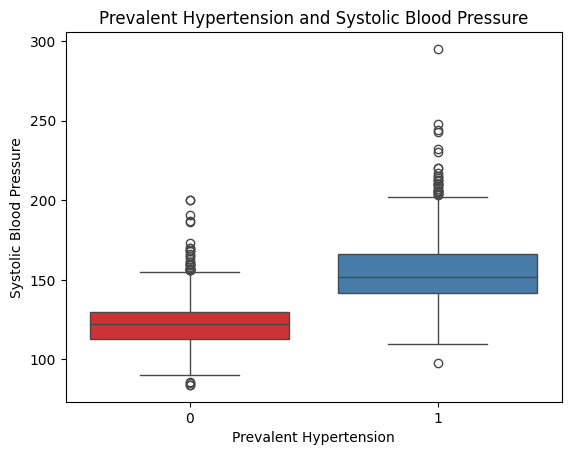

In [184]:
sns.boxplot(data=df, x="prevalentHyp", y="sysBP", palette="Set1")
plt.title('Prevalent Hypertension and Systolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
plt.xlabel('Prevalent Hypertension')

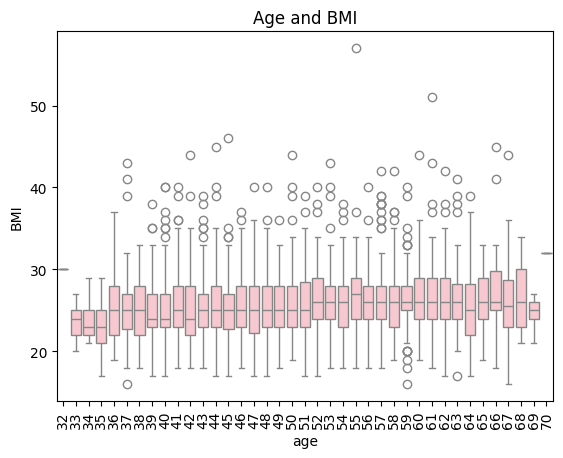

In [185]:
sns.boxplot(x='age', y = "BMI", data =df, color= 'pink')
plt.xticks(rotation=90)
plt.title('Age and BMI')
plt.show()

**A relationship between Age and Hypertension**

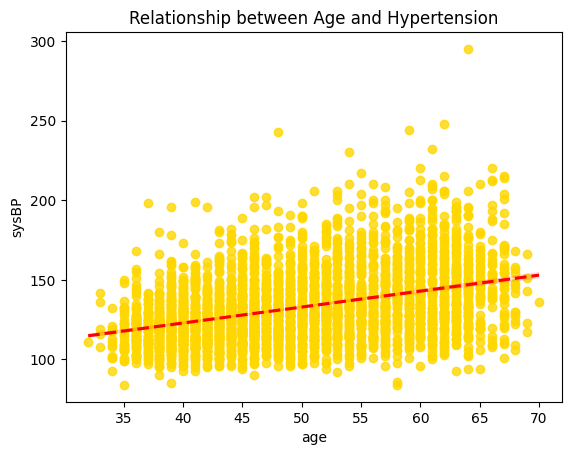

In [186]:
#Code to demonstrate regression line in a scatterplot

sns.regplot(x='age', y='sysBP', data =df, color='gold',
            line_kws=dict(color ='red', linestyle= '--'))
plt.title ('Relationship between Age and Hypertension')
plt.show()

In [187]:
a = df ['age']
b = df ['sysBP']
r_coef, r_p = pearsonr(a,b)
print(f"Pearson r Age, Systolic BP {r_coef: .3f}")

Pearson r Age, Systolic BP  0.388


**Pair Plot**

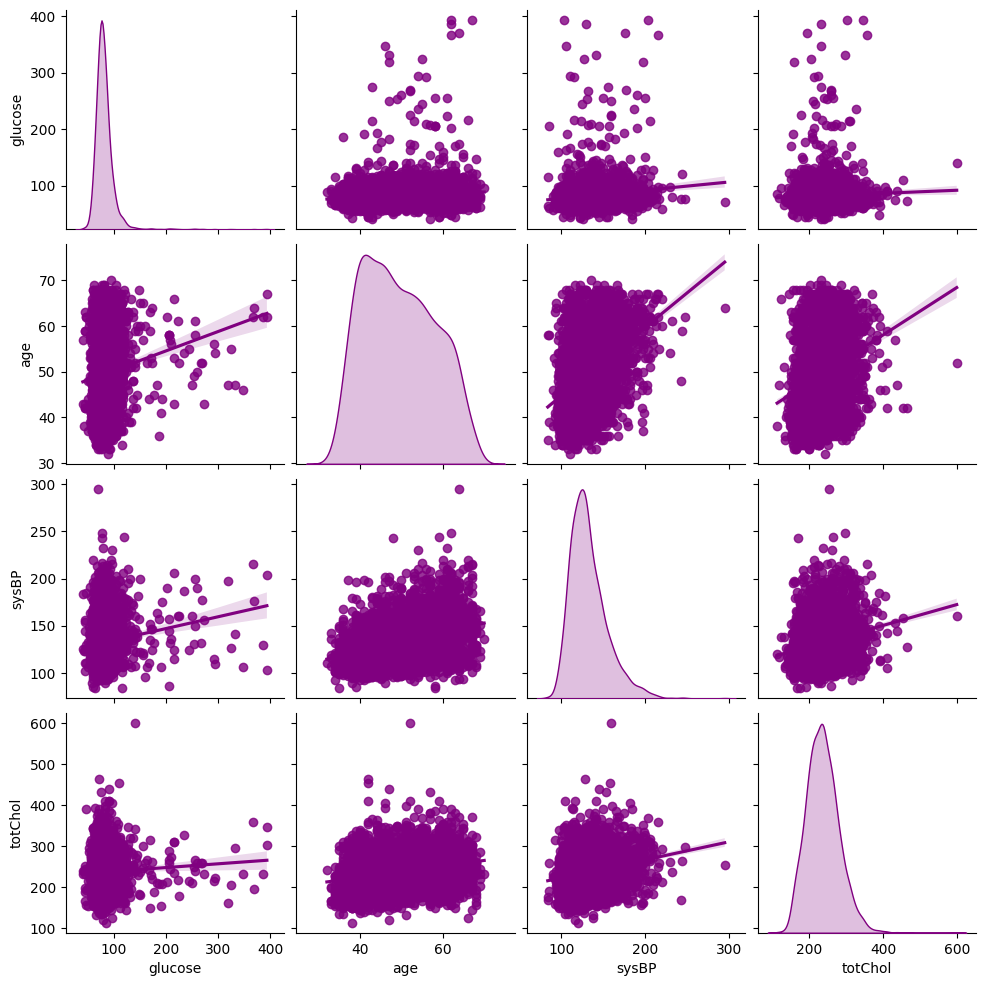

In [188]:
sel_columns = ['glucose', 'age', 'sysBP', 'totChol']
data_sel = df[sel_columns]
_=sns.pairplot(data_sel, kind = "reg", diag_kind = 'kde')

**Logistic Regression**

In [196]:
# Function to convert 'Yes' to 1 and 'No' to 0 in a DataFrame
def convert_yes_no(df):
    # Dictionary mapping 'Yes' to 1 and 'No' to 0
    conversion_dict = {'Yes': 1, 'No': 0}

    # Apply the conversion to each column
    for column in df.columns:
        if df[column].dtype == 'object':  # Checks if the column is of type object, typically used for strings
            df[column] = df[column].map(conversion_dict).fillna(df[column])
    return df

df = convert_yes_no(df)

X= df.loc[:, df.columns != 'TenYearCHD']
y = df.loc[:, df.columns == "TenYearCHD"]

In [189]:
#X= df.loc[:, df.columns != 'TenYearCHD']
#y = df.loc[:, df.columns == "TenYearCHD"]

In [201]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(float), X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.396538
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: TenYearCHD       Pseudo R-squared: 0.071     
Date:               2024-05-09 02:12 AIC:              2929.4828 
No. Observations:   3656             BIC:              3022.5446 
Df Model:           14               Log-Likelihood:   -1449.7   
Df Residuals:       3641             LL-Null:          -1560.3   
Converged:          1.0000           LLR p-value:      2.6818e-39
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
male               0.4027   0.1048  3.8440 0.0001  0.1974  0.6081
age                0.0289   0.0059  4.9414 0.0000  0.0174  0.0404


A quick look at the model prior to running test/training split.  It appears that currentSmoker, BPMeds, prevalentStroke, totChol, and glucose have p values >  0.05.

In [202]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

#Load the data
df= pd.read_csv('framingham_cleaned.csv')

# Preprocess the data
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the Model
model = LogisticRegression()
model.fit(X_train,y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8468550592525068


In [203]:
print('Classes', model.classes_)
print('Intercept', model.intercept_)
print('Coefficients', model.coef_)

Classes [0 1]
Intercept [-2.04985777]
Coefficients [[ 0.28505745  0.56614943 -0.01426069  0.07232851  0.23440439  0.0460556
   0.10801904  0.08532237  0.03651676  0.13801583  0.36662464 -0.01677263
   0.01348503 -0.10526111  0.15074961]]


In [210]:
print('Accuracy', model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

Accuracy 0.8468550592525068
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       923
           1       0.61      0.10      0.17       174

    accuracy                           0.85      1097
   macro avg       0.73      0.54      0.54      1097
weighted avg       0.81      0.85      0.80      1097



**Logistic Regression Results**




This model suggests identifying "no risk" individuals (85% precision, 99% recall) and correctly classifying most test data (84.7% accuracy). However, there's a catch! It struggles with "risk" cases (61% precision, 10% recall), missing many actual "risk" individuals. If identifying "risk" is critical, consider adjusting this model or exploring alternatives.

**ROC Curve**

Area under the curve is 0.71 which is considered acceptable classification method.

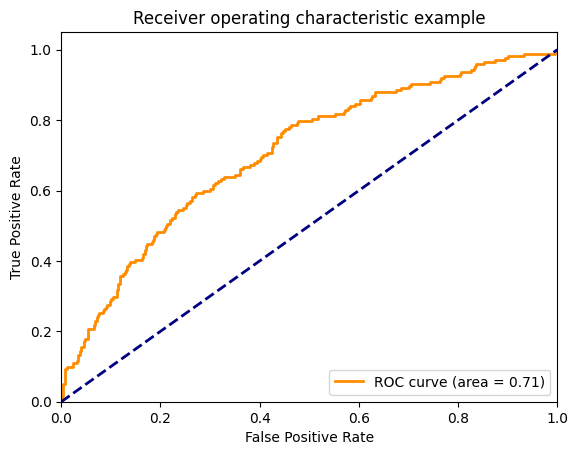

In [205]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


[[912  11]
 [157  17]]


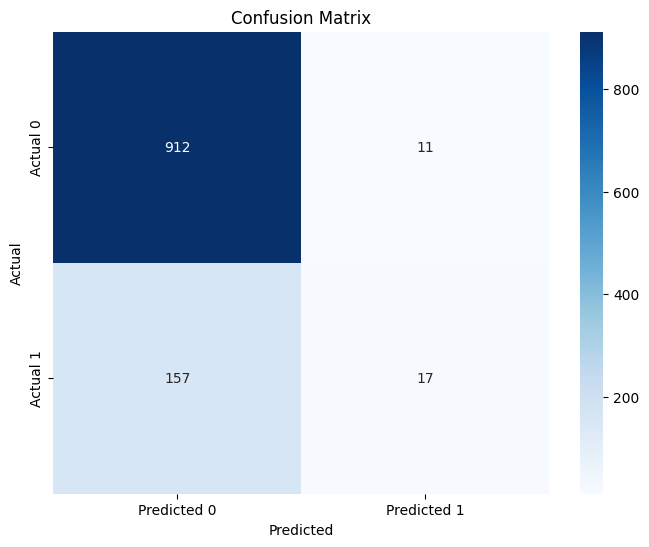

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**Conclusion**

This was a very interesting dataset to explore. Using this dataset allowed us to see how the logistic model works. But exploring the data allowed us to see interesting patterns.

When we ran the correlations, we found age and systolic blood pressure were  most highly correlated w/ CHD. However, when we ran the logistic regression model, we found additional variables were significant predictors of CHD. 7 additional variables - being male, cigarettes/day, chronic hypertension, diabetes, diastolic BP, heart rate, and BMI all contributed significantly to CHD. Education reduced the risk of CHD; the more highly educated persons had less risk of CHD.

In terms of prediction, the model predicted those not at risk very well, but failed to predict those at risk. The confusion matrix shows this. The prediction rate for True Negatives (upper left quadrant) was high; look at  the accuracy score model to see how the figures in that model are supported by the numbers in the confusion matrix. How the prediction of those at risk can be improved is the big question.